In [ ]:
import lyricsgenius as genius
geniusCreds = "ude5Dno6yD1ulj54vFIDn_sxo3ovPunXboFnKluomGUbMXQ2ILjZX4tJO856PP46"
artist_name = "Drake"

In [ ]:
api = genius.Genius(geniusCreds)
artist = api.search_artist(artist_name)

In [ ]:
import os
os.getcwd()

In [ ]:
artist.save_lyrics()

In [1]:
import pandas as pd
data_list = []

#formatting will be: ['title', 'album', 'year', 'lyrics']


In [2]:
# Any file under 500 bytes was discarded by hand, additional files were removed based on content 
#e.g. not a full song, or not music at all
import json
import os
path = "/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json"
for filename in os.listdir(path):
    if(os.path.isfile("/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json/" + filename)):
        with open("/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json/" + filename) as json_file:
            if(filename.endswith(".json")):
                data = json.load(json_file)
                title = data['songs'][0]['title']
                album = data['songs'][0]['album']
                year = data['songs'][0]['year']
                lyrics = data['songs'][0]['lyrics']
                data_list.append([title,album,year,lyrics])
    

In [3]:
columns = ['title', 'album', 'year', 'lyrics']
df = pd.DataFrame(data_list, columns = columns)

In [4]:
df.head()

,title,album,year,lyrics
0,Buried Alive (Interlude),Take Care,2011-11-15,[Intro: Kendrick Lamar]\nIf you was in a pine ...
1,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
2,Separate LivesVer,None,None,"Verse:\nYeah yeah uh\nI'm feelin' you, gaurant..."
3,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
4,Take You Down (Freestyle),None,None,(Intro)\nDrake Talking/ad-libing:\nIts Young M...


In [5]:
#df.to_csv('lyrics.csv')

In [6]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
text = " ".join(lyrics for lyrics in df.lyrics)
print ("There are {} words in the combination of all lyrics.".format(len(text)))

There are 1086761 words in the combination of all lyrics.


In [ ]:
#Clean text data
"""query = text
stopwords = ['verse', 'drake', 'chorus', 'intro', 'hook', '[Intro', '[Verse']
querywords = query.split()

resultwords  = [word for word in querywords if word.lower() not in stopwords]
result = ' '.join(resultwords)

print ("There are {} words in the reduced pool of lyrics.".format(len(result)))"""

In [8]:
stopwords = set(STOPWORDS)
new_words =open("/Users/nickbatarilo/Desktop/lyric_anal/stopwords.txt").read().split()
new_stopwords=stopwords.union(new_words)

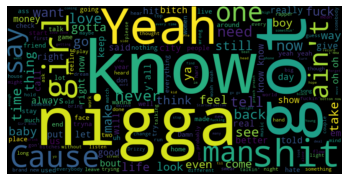

In [9]:
wordcloud = WordCloud(width = 800, height = 400, stopwords = new_stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
wordcloud.to_file("no_bridge.png")